## Plots

In [9]:
import numpy as np
import os
from time import time
import gzip, pickle
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns


projdir = "/Users/helmutsimon/repos/bayescoalescentest/shared"
if not os.getcwd() == projdir:
    os.chdir(projdir)
import run_MCMC

path = "/Users/helmutsimon/Google Drive/Genetics/bayes_coalescent_est"
if not os.getcwd() == path:
    os.chdir(path)

#job_no = '010'
job_no = 'yri1'
#fname2 = 'data/branch_vars_' + job_no + '.pklz'  # branch length variates derived from MCMC process
#fname2 = "data/YRI_sample_vars1.pklz"
fname2 = "sim_data/branch_vars_sim6.pklz"
with gzip.open(fname2, 'rb') as brvars:
    brvars = pickle.load(brvars)
    
n = brvars.shape[0] + 1

properties = dict()
properties['Author'] = 'Helmut Simon'

Plot branch lengths

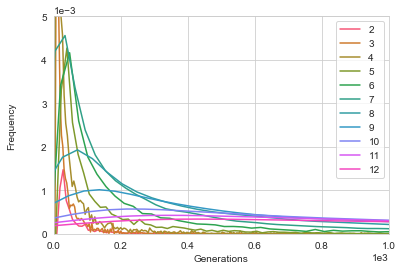

[   5.78677232    7.68840206   20.51993522   61.59760383  150.67240107
  332.86823177  665.81584513 1081.98265423 1614.80005818 1990.42367458
 2359.03869722]


In [6]:
pdfname = 'brfig' + job_no + '.pdf'
properties['Title'] = 'Posterior distribution of branch lengths'
properties['Subject'] = 'Datafile: ' + fname2
fig = run_MCMC.print_pds(pdfname, brvars, truevalues=None, properties=properties, savepdf=False, xlim=1000, ylim=5e-3)
plt.show()
print(np.mean(brvars, axis=1))

Plot coalescence times

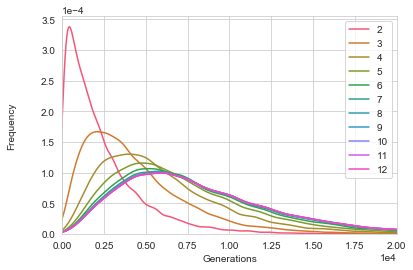

[2359.03869722 4349.4623718  5964.26242998 7046.24508421 7712.06092935
 8044.92916111 8195.60156219 8257.19916601 8277.71910123 8285.40750329
 8291.19427561]


In [7]:
branches_rev = np.flipud(brvars)
coal_times = np.cumsum(branches_rev, axis=0)
#true_coal_times =  np.cumsum(true_branch_lengths[::-1])

pdfname = 'coalfig' + job_no + '.pdf'
properties['Title'] = 'Posterior distribution of coalescence times.'
properties['Subject'] = 'Datafile: ' + fname2
fig = run_MCMC.print_pds(pdfname, coal_times, truevalues=None, properties=properties, savepdf=False, xlim=2e4)
plt.show()
print(np.mean(coal_times, axis=1))

Calculate ancestral distributions

In [ ]:
draws = 50000
anc_proc = np.zeros((n, 100))
tlim = 5000000        # Needs to be set from branch lengths and TMRCA above.
r = tlim / 100
branches_rev = np.flipud(brvars)
coal_times = np.cumsum(branches_rev, axis=0)
x_gens = np.arange(0, 100)
for k in range(n):
    for t in x_gens:
        for var_ix in range(brvars.shape[1]):
            if sum(coal_times[:,var_ix] < t * r) == k:
                anc_proc[k, t] += 1
anc_proc = anc_proc / draws                

Plot ancestral distributions

In [ ]:
cols = sns.husl_palette(n_colors=n - 1, s=0.9, l=0.6)
cols.reverse()
pdfname = 'anc_fig' + job_no + '.pdf'
with PdfPages(pdfname) as pdf:
    fig = plt.figure()
    plt.figure(figsize=(15, 10))
    for row, col, label in zip(anc_proc, cols, np.arange(n, 1, -1)):
        sns.lineplot(x=x_gens * r, y=row, color=col, label=label)
    plt.xlabel('Generations')
    plt.ylabel('Probability')
    #plt.xlim((0, 5100000))
    #plt.ylim((0,1))
    plt.legend()
    ymax = plt.gca().get_ylim()[1]
    plt.vlines(true_coal_times, 0, ymax, colors=cols, linestyles='dashed')
    pdf.savefig(fig, bbox_inches='tight')
plt.show()

Plot posterior distribution of TMRCA

2012.6
732.1
3915.2


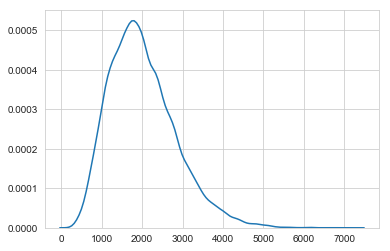

In [10]:
tmrca_vars = np.sum(brvars, axis=0)
sns.kdeplot(tmrca_vars)
print("%.1f" % np.mean(tmrca_vars))
print("%.1f" % np.quantile(tmrca_vars, 0.025))
print("%.1f" % np.quantile(tmrca_vars, 0.975))